# Exercise

Use the code in this notebook to complete the following exercises:

1. For `df1`:

    - Take a look at the data in `df1`.
    - Does `x` increase from time one to time two?
    - Visualize the relationship between `x` and `time`.
    - Run a statistical test to further examine the relationship between these features.
    
 1. For `df2`:
 
    - Take a look at the data in `df2`.
    - Visualize the relationship between `x` and `y`.
    - How would you describe the relationship between `x` and `y`?
    - Run a statistical test to examine the relationship between `x` and `y`.

1. For `df3`:

    - Take a look at the data in `df3`
    - Which surgeon has the higher success rate?
    - If you had to have heart bypass surgery, which surgeon would you go to?

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats

df1 = pd.read_csv('https://gist.githubusercontent.com/zgulde/cf9e11788c122bf6a75447209f8a9f0e/raw/17535dc2c29d6c47c228279e8941c037bb2d4405/one.csv')
df2 = pd.read_csv('https://gist.githubusercontent.com/zgulde/cf9e11788c122bf6a75447209f8a9f0e/raw/17535dc2c29d6c47c228279e8941c037bb2d4405/two.csv')
df3 = pd.read_csv('https://gist.githubusercontent.com/zgulde/cf9e11788c122bf6a75447209f8a9f0e/raw/a6e34db05ac8d817789c205787527974fa10c092/three.csv')

For df1:

- Take a look at the data in df1.
- Does x increase from time one to time two?
- Visualize the relationship between x and time.
- Run a statistical test to further examine the relationship between these features.

In [2]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   group   200 non-null    object 
 1   x       200 non-null    float64
 2   time    200 non-null    object 
dtypes: float64(1), object(2)
memory usage: 4.8+ KB


In [3]:
df1.head()

,group,x,time
0,a,7.087113,one
1,a,5.164441,one
2,a,6.150206,one
3,a,3.732648,one
4,a,5.181035,one


In [4]:
df1.time.value_counts()

two    100
one    100
Name: time, dtype: int64

In [19]:
# let's compare the mean of x during time=one, and time=two
x1 = df1['x'][df1['time'] == 'one']
x2 = df1['x'][df1['time'] == 'two']

In [25]:
alpha = 0.05

7.296448106590939

In [22]:
t, p = stats.ttest_ind(x1, x2, equal_var=True)
t, p, alpha

(-5.443902721870272, 1.5320971681720527e-07, 0.05)

<AxesSubplot:xlabel='time', ylabel='x'>

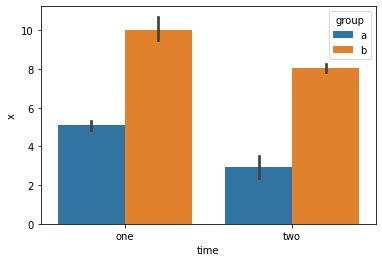

In [27]:
sns.barplot(data=df1, x='time', y='x', hue='group')

For df2:

- Take a look at the data in df2.
- Visualize the relationship between x and y.
- How would you describe the relationship between x and y?
- Run a statistical test to examine the relationship between x and y.

In [29]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       200 non-null    float64
 1   y       200 non-null    float64
 2   group   200 non-null    object 
dtypes: float64(2), object(1)
memory usage: 4.8+ KB


In [30]:
df2.x.value_counts()

108.297809    1
86.751753     1
93.109930     1
94.689303     1
88.403703     1
             ..
96.104233     1
111.251830    1
91.010935     1
97.782848     1
110.833371    1
Name: x, Length: 200, dtype: int64

In [31]:
df2.y.value_counts()

652.564372    1
640.256527    1
654.973215    1
610.907823    1
571.194765    1
             ..
586.904085    1
637.517844    1
648.540001    1
575.624012    1
591.320338    1
Name: y, Length: 200, dtype: int64

In [39]:
df2.group.value_counts()

c    50
b    50
a    50
d    50
Name: group, dtype: int64

In [33]:
# x and y are both continuous, so we will use a pearsons r

corr, p = stats.pearsonr(df2.x, df2.y)
corr, p

(0.5693902765694359, 1.3960403186191819e-18)

/opt/homebrew/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='x', ylabel='y'>

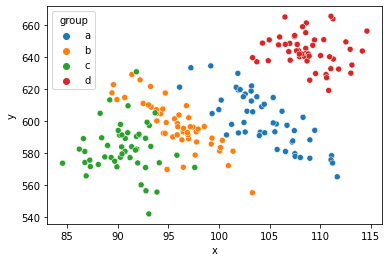

In [40]:
sns.scatterplot(df2.x, df2.y, hue=df2.group)

In [42]:
x_a = df2['x'][df2['group']=='a']
x_b = df2['x'][df2['group']=='b']
x_c = df2['x'][df2['group']=='c']   
x_d = df2['x'][df2['group']=='d']
y_a = df2['y'][df2['group']=='a']
y_b = df2['y'][df2['group']=='b']
y_c = df2['y'][df2['group']=='c']
y_d = df2['y'][df2['group']=='d']

In [43]:
# let's look at group a
corr, p = stats.pearsonr(x_a, y_a)
corr, p

(-0.7704659867454253, 6.039101149896488e-11)

In [44]:
# let's look at group b
corr, p = stats.pearsonr(x_b, y_b)
corr, p

(-0.8015459032219343, 2.689971023670142e-12)

In [45]:
# let's look at group c
corr, p = stats.pearsonr(x_c, y_c)
corr, p

(-0.033427735841026485, 0.8177377121305764)

In [47]:
# let's look at groub d
corr, p = stats.pearsonr(x_d, y_d)
corr, p

(-0.13984004031571245, 0.3327555383688004)